In [13]:
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt

import pandas
from BinSpectra import lowres_dataset
import warnings
from progress.bar import Bar
import random
#warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
PATH = '../Data/DataProducts/'

In [14]:
def loaddata(phase):
    dsname = "dataset{}.pickle".format(phase)
    return snid.loadPickle(PATH + dsname)    


def classify_spectra(phase, dphase=5):
    warnings.filterwarnings('ignore')
    exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
    av_svm_score_dict = {}
    av_svm_std = {}
    bin_length_list = []
    bar = Bar('Processing', max=20)
    k = 0.0027069686088658784
    while k <= 0.11098571296350102:
        datain = loaddata(phase)
        dataset_lowres = lowres_dataset(datain, k)
        snidPCA_ph = SNePCA.SNePCA(dataset_lowres, phase - dphase, phase + dphase)
        snidPCA_ph.snidPCA()
        snidPCA_ph.calcPCACoeffs()
        for i in range(1, 5):
            for j in range(i + 1, 6):
                svmsc,av,std=snidPCA_ph.runSVM(i,j,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True,excludeSNe=exclude,std_rad=1.0,svm=True,count=3,fig=None,ax=None,ncv=50,markOutliers=True)
                av_svm_score_dict.setdefault('PC%d vs PC%d'%(i, j), []).append(av)
                av_svm_std.setdefault('PC%d vs PC%d'%(i, j), []).append(std)
        bin_length_list.append(k)
        bar.next()
        k = k + 0.010827874435463514
    bar.finish()
    return np.array(bin_length_list), av_svm_score_dict, av_svm_std

def classify_plot_spectra(phase, dphase=5):
    warnings.filterwarnings('ignore')
    exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
    av_svm_score_dict = {}
    av_svm_std = {}
    bin_length_list = []
    bar = Bar('Processing', max=20)
    PATH_save = '../Plots/lowres/'
    m = 0
    k = 0.0027069686088658784
    while k <= 0.11098571296350102:
        dataset = loaddata(phase)
        dataset_lowres = lowres_dataset(dataset, k)
        ###### this section plots the spectra at each lower resolution before feeding to the classifier ##########
        dataset_key_list = list(dataset_lowres.keys())
        plot_dataset, axs = plt.subplots(len(dataset_lowres), figsize=(16,200), gridspec_kw={'hspace':.5})
        number_of_colors = len(dataset)
        colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for h in range(number_of_colors)]
        i = 0
        #axs.set_prop_cycle(cycler('color', colors))
        for sne in dataset_key_list:
            wvl = dataset_lowres[sne].wavelengths
            flux = dataset_lowres[sne].data
            axs[i].plot(wvl, flux, color = colors[i], linewidth=1.5, label = "%s"%sne)
            axs[i].set_xlabel('Wavelength', fontsize=18)
            axs[i].set_ylabel('Flux', fontsize=18)
            axs[i].tick_params(axis='both', which='major', labelsize=18)
            axs[i].legend(loc="upper right", fontsize = '12')
            i = i + 1
        m = m + 1
        plot_dataset.savefig(PATH_save + 'spectra_plot_ph%d_%d.png'%(phase, m), bbox_inches='tight')
        plt.close()
        #####################################################################################################
        snidPCA_ph = SNePCA.SNePCA(dataset_lowres, phase - dphase, phase + dphase)
        snidPCA_ph.snidPCA()
        snidPCA_ph.calcPCACoeffs()
        for i in range(1, 5):
            for j in range(i + 1, 6):
                svmsc,av,std=snidPCA_ph.runSVM(i,j,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True,excludeSNe=exclude,std_rad=1.0,svm=True,count=3,fig=None,ax=None,ncv=50,markOutliers=True)
                av_svm_score_dict.setdefault('PC%d vs PC%d'%(i, j), []).append(av)
                av_svm_std.setdefault('PC%d vs PC%d'%(i, j), []).append(std)
        bin_length_list.append(k)
        bar.next()
        k = k + 0.010827874435463514
    bar.finish()
    return np.array(bin_length_list), av_svm_score_dict, av_svm_std

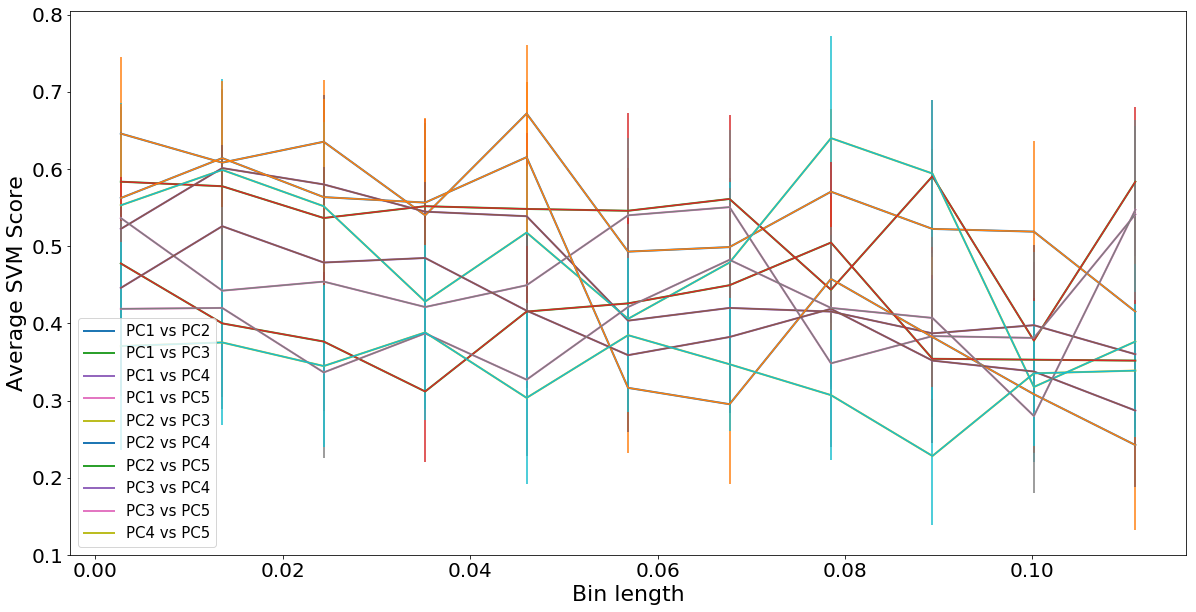

In [3]:
svm_score = classify_spectra(0)
plt.figure(figsize=(20,10))
for i in range(1, 5):
    for j in range(i+1, 6):
        pcstring = "PC{} vs PC{}".format(i, j)
        #print(pcstring)
        
        plt.plot(svm_score[0], svm_score[1][pcstring], label =pcstring, linewidth=2)
        plt.errorbar(svm_score[0], svm_score[1][pcstring], yerr = svm_score[2][pcstring])
plt.xlabel('Bin length', fontsize=22)
plt.ylabel('Average SVM Score', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=15)

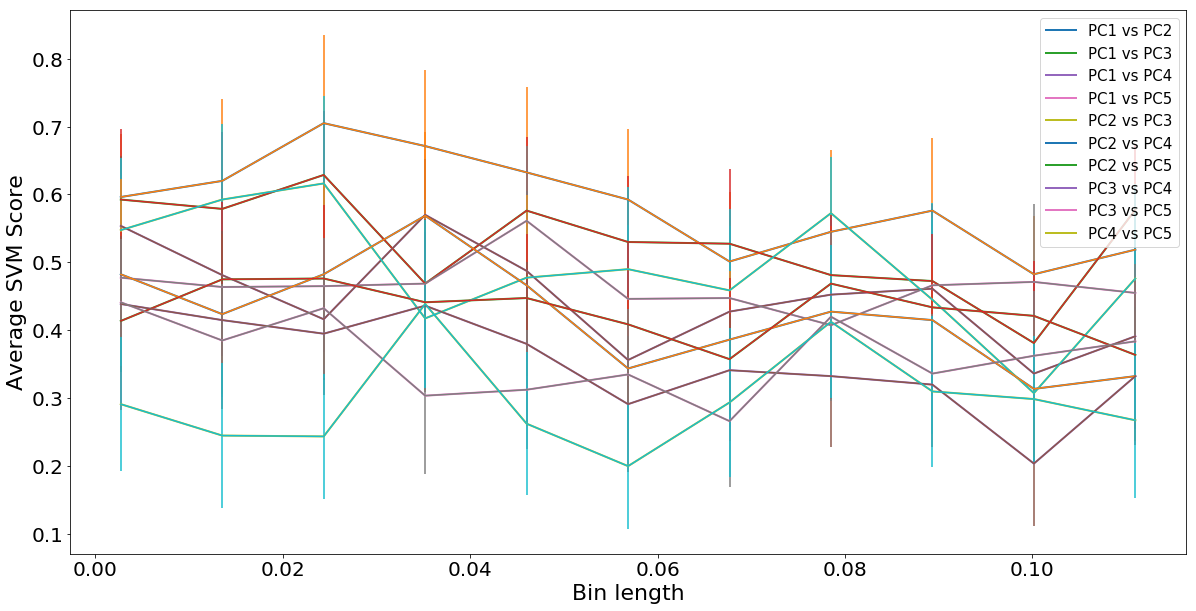

In [4]:
svm_score = classify_spectra(5)
plt.figure(figsize=(20,10))
for i in range(1, 5):
    for j in range(i+1, 6):
        pcstring = "PC{} vs PC{}".format(i, j)
        #print(pcstring)
        
        plt.plot((svm_score[0]), svm_score[1][pcstring], label =pcstring, linewidth=2)
        plt.errorbar(svm_score[0], svm_score[1][pcstring], yerr = svm_score[2][pcstring])
plt.xlabel('Bin length', fontsize=22)
plt.ylabel('Average SVM Score', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=15)

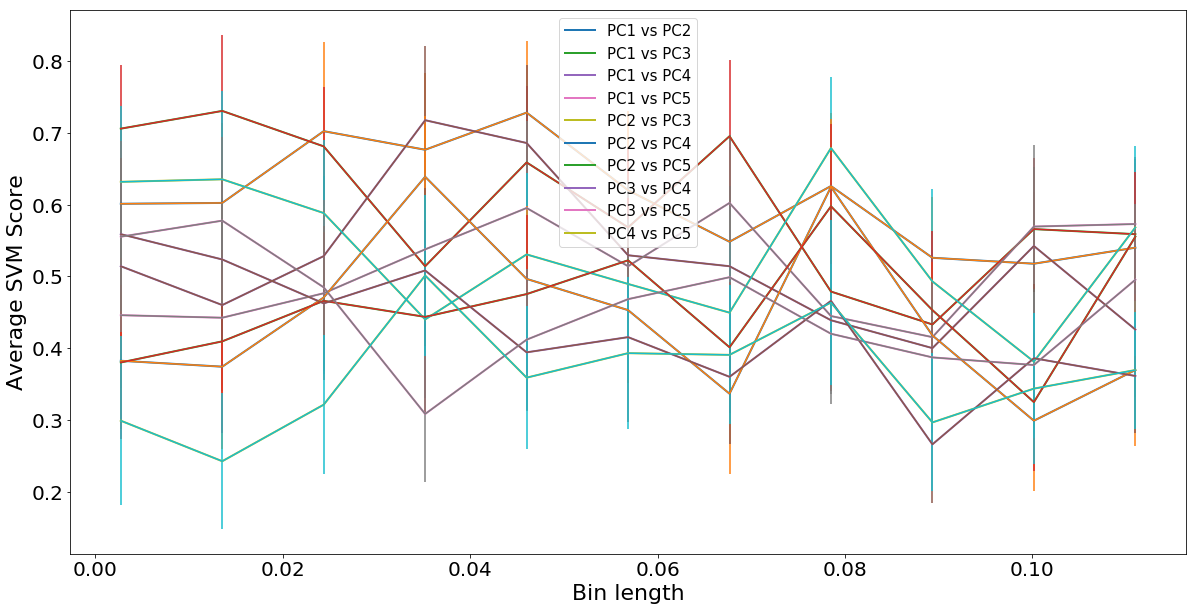

In [5]:
svm_score = classify_spectra(phase=10)
plt.figure(figsize=(20,10))
for i in range(1, 5):
    for j in range(i+1, 6):
        pcstring = "PC{} vs PC{}".format(i, j)
        #print(pcstring)
        
        plt.plot(svm_score[0], svm_score[1][pcstring], label =pcstring, linewidth=2)
        plt.errorbar(svm_score[0], svm_score[1][pcstring], yerr = svm_score[2][pcstring])
plt.xlabel('Bin length', fontsize=22)
plt.ylabel('Average SVM Score', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=15)

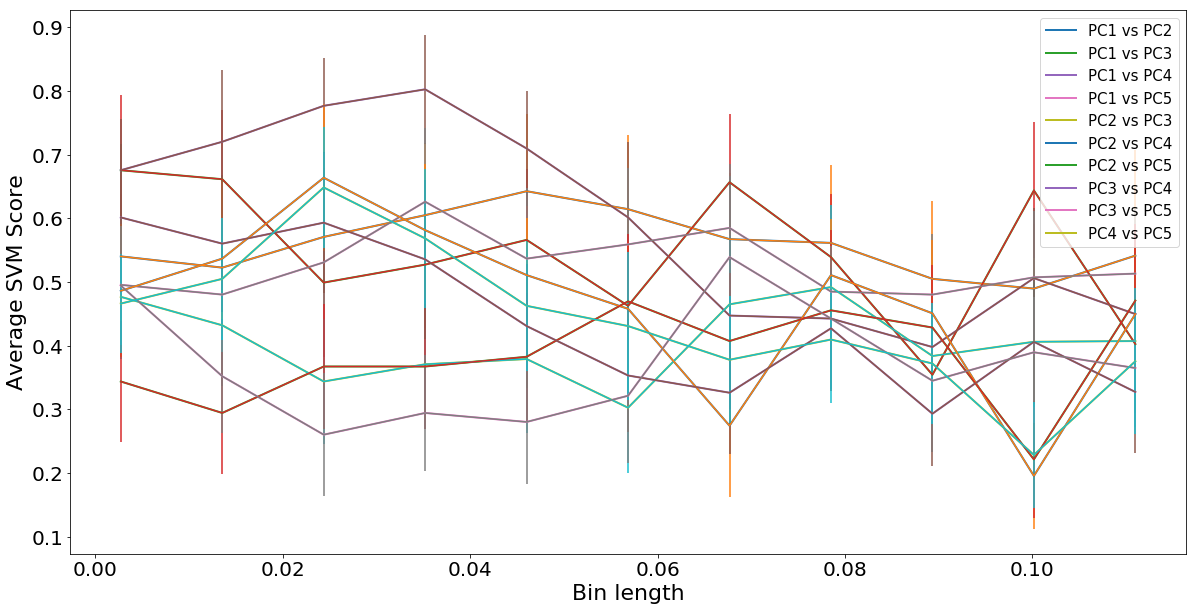

In [6]:
phase = 15
svm_score = classify_spectra(phase)
plt.figure(figsize=(20,10))
for i in range(1, 5):
    for j in range(i+1, 6):
        pcstring = "PC{} vs PC{}".format(i, j)
        #print(pcstring)
        
        plt.plot(svm_score[0], svm_score[1][pcstring], label =pcstring, linewidth=2)
        plt.errorbar(svm_score[0], svm_score[1][pcstring], yerr = svm_score[2][pcstring])
plt.xlabel('Bin length', fontsize=22)
plt.ylabel('Average SVM Score', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=15)

$\overset{\circ}{A}$